Zbiór danych - Online news popularity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "/content/drive/MyDrive/Colab Notebooks/EDproj/OnlineNewsPopularity.csv"
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDproj/OnlineNewsPopularity.csv")

data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


Wybrane atrybuty

In [ ]:
x = data[[' n_unique_tokens', ' num_hrefs', ' num_imgs', ' rate_negative_words', ' shares']][0:1000]
x

,n_unique_tokens,num_hrefs,num_imgs,rate_negative_words,shares
0,0.663594,4.0,1.0,0.230769,593
1,0.604743,3.0,1.0,0.266667,711
2,0.575130,3.0,1.0,0.142857,1500
3,0.503788,9.0,1.0,0.333333,1200
4,0.415646,19.0,20.0,0.139785,505
...,...,...,...,...,...
995,0.493884,10.0,1.0,0.190476,785
996,0.436762,5.0,12.0,0.380952,2400
997,0.631068,2.0,1.0,0.333333,2300
998,0.516547,6.0,1.0,0.184211,5200


Macierz korelacji

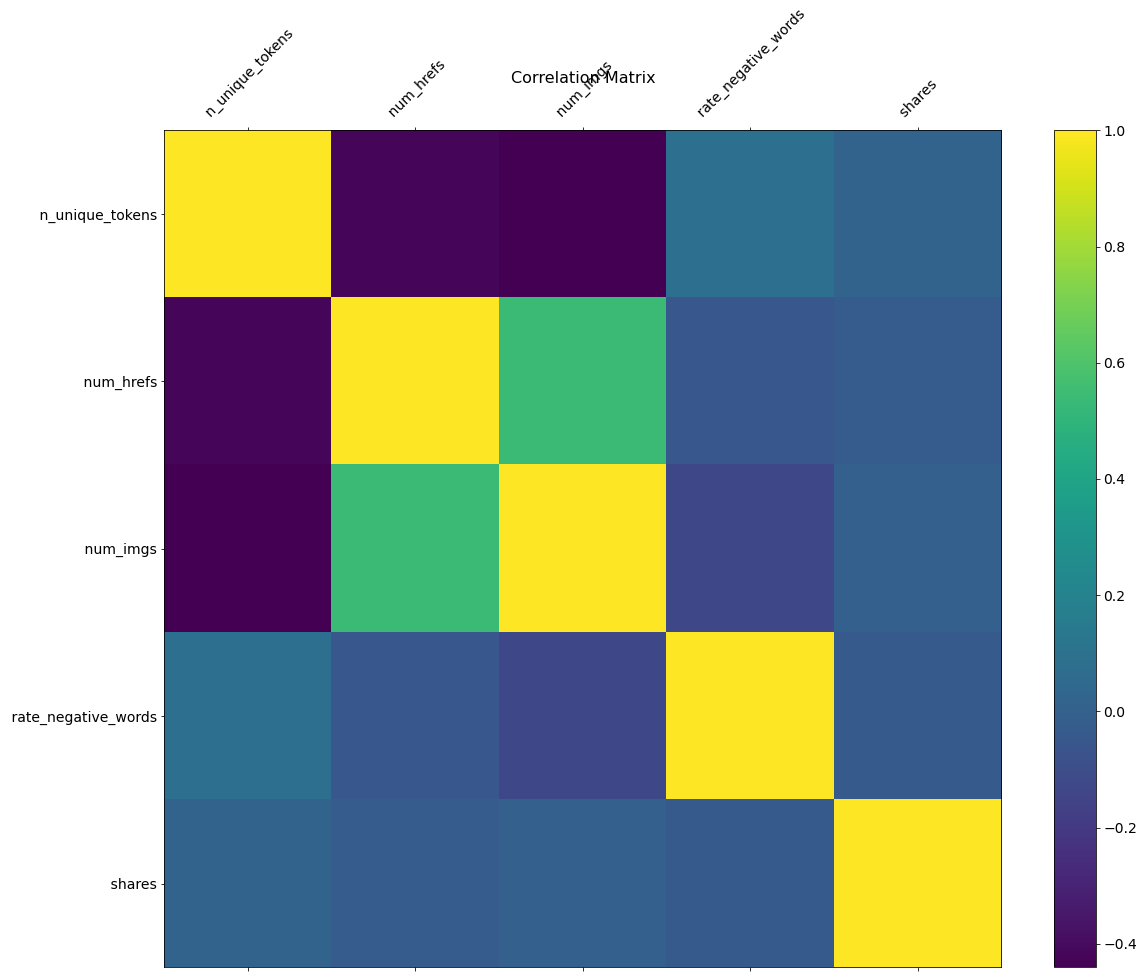

In [ ]:
df = x
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
df.corr()

,n_unique_tokens,num_hrefs,num_imgs,rate_negative_words,shares
n_unique_tokens,1.000000,-0.418893,-0.440458,0.086712,0.017745
num_hrefs,-0.418893,1.000000,0.542320,-0.050727,-0.020444
num_imgs,-0.440458,0.542320,1.000000,-0.125475,0.000223
rate_negative_words,0.086712,-0.050727,-0.125475,1.000000,-0.029826
shares,0.017745,-0.020444,0.000223,-0.029826,1.000000


In [ ]:
#np.cov(x.T.values)
df = pd.DataFrame(np.cov(x.T.values), columns = [' n_unique_tokens', ' num_hrefs', ' num_imgs', ' rate_negative_words', ' shares'])
df

,n_unique_tokens,num_hrefs,num_imgs,rate_negative_words,shares
0,0.011371,-0.394103,-0.314276,0.001378,7.474448e+00
1,-0.394103,77.841758,32.016110,-0.066678,-7.124865e+02
2,-0.314276,32.016110,44.772644,-0.125085,5.884711e+00
3,0.001378,-0.066678,-0.125085,0.022196,-1.755281e+01
4,7.474448,-712.486523,5.884711,-17.552807,1.560321e+07


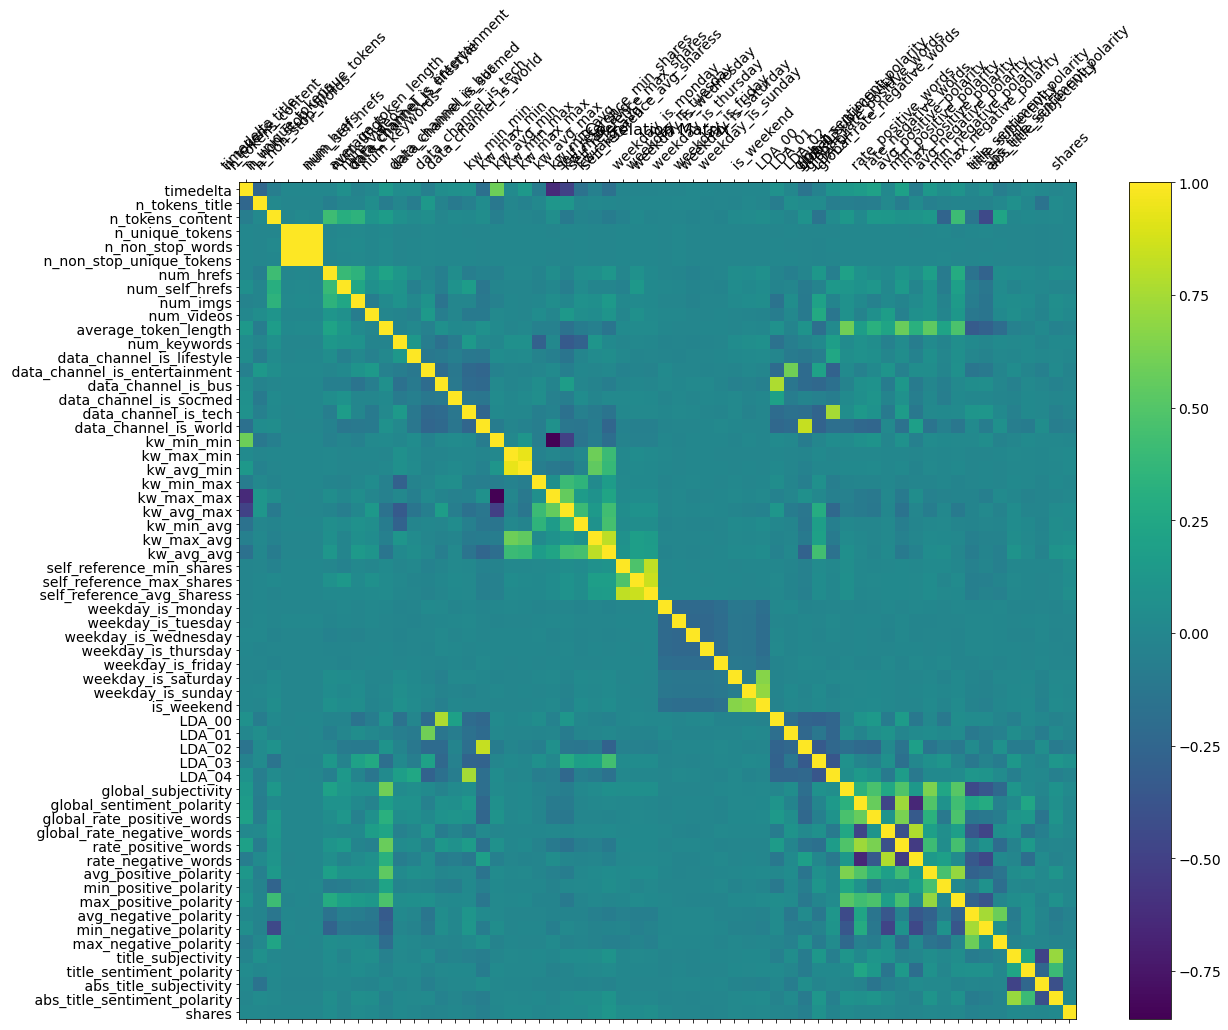

In [ ]:
df = data
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Elementy nietypowe

In [ ]:
from sklearn import preprocessing

df = data[[' n_unique_tokens', ' num_hrefs', ' num_imgs', ' rate_negative_words', ' shares']][0:1000]


for column in df.columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

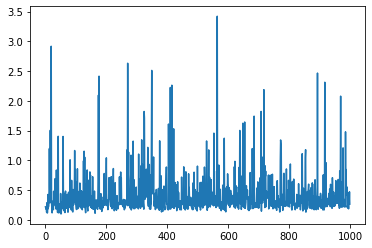

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

X = df.values
standard = preprocessing.scale(X)

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(standard)

distances, indexes = nbrs.kneighbors(standard)
plt.plot(distances.mean(axis=1))

In [ ]:
outlier_index = np.where(distances.mean(axis = 1) > 1.5)
list_index_to_remove = list(*outlier_index)

In [ ]:
outlier_values = df.iloc[outlier_index]
outlier_values

,n_unique_tokens,num_hrefs,num_imgs,rate_negative_words,shares
16,-0.483492,1.861314,1.213976,0.766967,2.808680
19,-1.438313,1.634629,5.697452,-0.869506,3.694736
174,-1.066904,2.768056,1.662324,2.366684,2.277047
176,2.213587,-0.972254,-0.579415,1.222576,6.454167
270,2.089470,-0.858911,-0.579415,-0.150353,8.833860
324,-0.421364,0.501202,-0.429965,0.236884,5.745322
325,-1.545714,1.294601,2.260120,-0.928817,3.340314
349,-0.155535,1.407943,1.064527,-0.869506,7.745277
404,0.181736,0.727887,1.363425,3.392143,-0.305173
410,-1.307502,-0.178855,-0.429965,-0.518699,9.340177


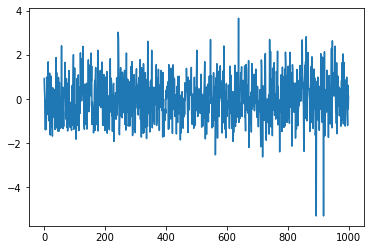

In [ ]:
plt.plot(range(0,1000), df[' n_unique_tokens'])

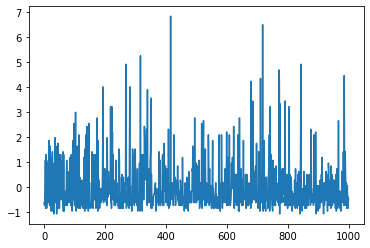

In [ ]:
plt.plot(range(0,1000), df[' num_hrefs'])

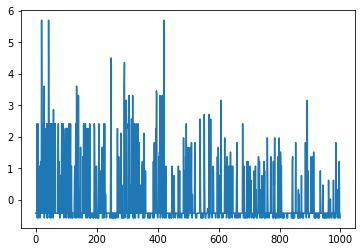

In [ ]:
plt.plot(range(0,1000), df[' num_imgs'])

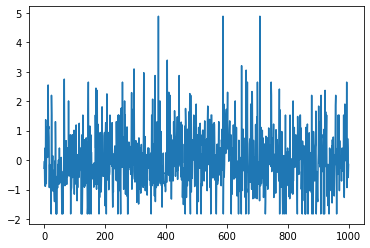

In [ ]:
plt.plot(range(0,1000), df[' rate_negative_words'])

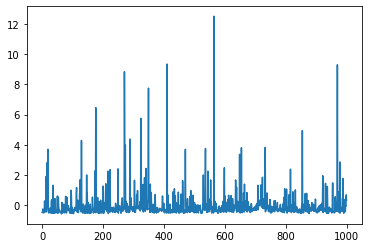

In [ ]:
plt.plot(range(0,1000), df[' shares'])

In [ ]:
df = df.drop(labels=list_index_to_remove, axis=0)
num = 1000 - len(list_index_to_remove)

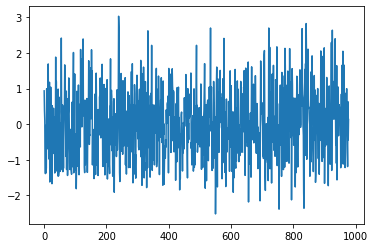

In [ ]:
plt.plot(range(num), df[' n_unique_tokens'])

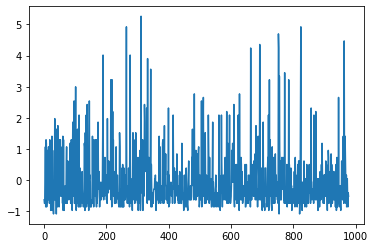

In [ ]:
plt.plot(range(num), df[' num_hrefs'])

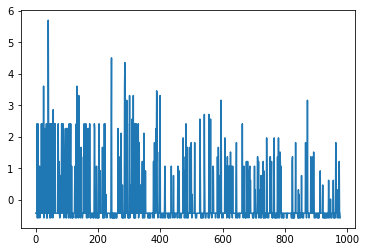

In [ ]:
plt.plot(range(num), df[' num_imgs'])

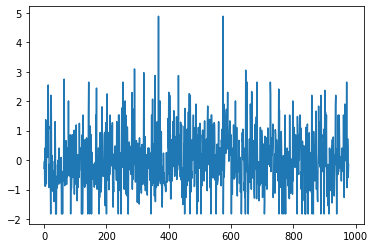

In [ ]:
plt.plot(range(num), df[' rate_negative_words'])

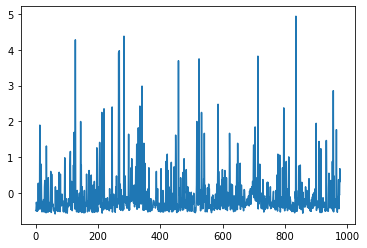

In [ ]:
plt.plot(range(num), df[' shares'])

Klasteryzacja - nienadzorowana klasyfikacja

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(df.values)
kmeans.labels_

array([2, 2, 2, 3, 0, 1, 0, 0, 1, 1, 3, 2, 3, 1, 3, 3, 2, 2, 0, 3, 0, 2,
       1, 1, 2, 0, 2, 3, 3, 3, 2, 2, 2, 3, 0, 1, 3, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 3, 2, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 1,
       2, 2, 1, 3, 3, 2, 0, 1, 2, 3, 3, 2, 1, 2, 1, 3, 3, 0, 0, 2, 3, 0,
       0, 2, 1, 3, 3, 2, 1, 0, 3, 2, 1, 0, 0, 0, 3, 3, 3, 2, 2, 0, 2, 3,
       2, 3, 0, 1, 3, 3, 3, 1, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 2, 0, 0, 1,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 2, 1, 1, 3, 0, 2, 3, 1, 2, 2, 1, 2, 2,
       2, 0, 2, 3, 3, 3, 0, 0, 3, 2, 2, 0, 1, 1, 1, 0, 2, 3, 3, 0, 1, 1,
       2, 3, 2, 1, 1, 2, 3, 2, 2, 2, 1, 2, 0, 0, 2, 3, 2, 3, 1, 0, 3, 1,
       1, 3, 2, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 0, 2, 2, 1, 0, 1,
       0, 2, 0, 2, 2, 3, 3, 3, 1, 3, 2, 3, 3, 1, 1, 3, 3, 2, 2, 1, 2, 1,
       0, 0, 3, 2, 2, 2, 3, 1, 2, 1, 3, 1, 2, 1, 3, 2, 1, 2, 1, 3, 1, 2,
       0, 2, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 0, 2, 3, 2, 2, 1, 1, 2, 3, 0,
       0, 1, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2,

In [ ]:
colors = ['blue', 'red', 'orange', 'green', 'black']
point_colors = []
for elem in kmeans.labels_:
    point_colors.append(colors[elem])

In [ ]:
from itertools import combinations

columns = df.columns
pairs = list(combinations(columns, r=2))
print(pairs)

[(' n_unique_tokens', ' num_hrefs'), (' n_unique_tokens', ' num_imgs'), (' n_unique_tokens', ' rate_negative_words'), (' n_unique_tokens', ' shares'), (' num_hrefs', ' num_imgs'), (' num_hrefs', ' rate_negative_words'), (' num_hrefs', ' shares'), (' num_imgs', ' rate_negative_words'), (' num_imgs', ' shares'), (' rate_negative_words', ' shares')]


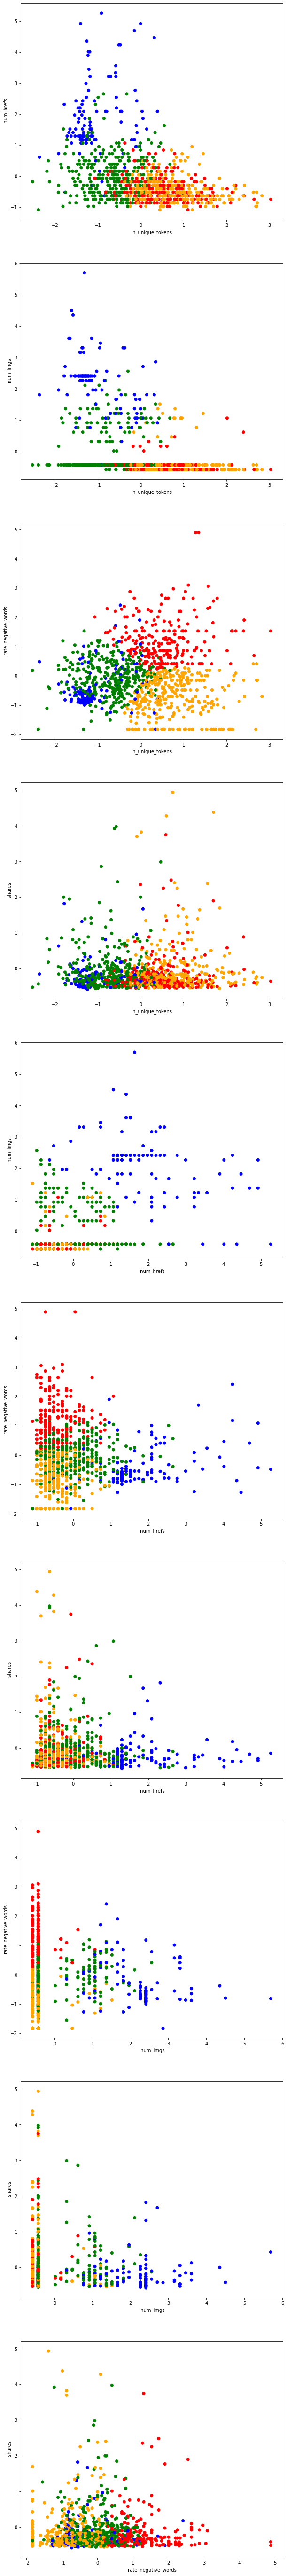

In [ ]:
fig, axes = plt.subplots(10, figsize = (10, 100))

for i in range(len(pairs)):
    comb = pairs[i]
    axes[i].set_xlabel(comb[0])
    axes[i].set_ylabel(comb[1])
    axes[i].scatter(x = df[comb[0]], y = df[comb[1]], color=point_colors)

plt.show()

# 1 -> duzo linkow, duzo obrazkow, mało unikalnych słow, mało negatywnych, shares losowe -> rozrywkowe / plotki? czerwony
# 2 -> malo linkow, malo obrazkow, duzo unikalnych slow, duzo negatywnych, shares losowe -> zle informacyjne / updaki firm / wycieki? niebieski
# 3 -> malo linkow, malo obrazkow, duzo unikalnych slow, mało negatywnych, shares losowe -> branzowe / informacyjne? zolty
# 4 -> malo linkow, malo obrazkow, malo unikalnych slow, mało negatywnych, shares losowe -> wywiady / poradniki / blogi? zielony

In [ ]:
print(list_index_to_remove)
for idx in list_index_to_remove:
  kmeans.labels_ = np.insert(kmeans.labels_, idx, -1)

kmeans.labels_

[16, 19, 174, 176, 270, 324, 325, 349, 404, 410, 415, 421, 564, 638, 648, 654, 685, 708, 717, 893, 917, 969]


array([ 2,  2,  2,  3,  0,  1,  0,  0,  1,  1,  3,  2,  3,  1,  3,  3, -1,
        2,  2, -1,  0,  3,  0,  2,  1,  1,  2,  0,  2,  3,  3,  3,  2,  2,
        2,  3,  0,  1,  3,  2,  0,  2,  0,  0,  0,  2,  0,  2,  0,  0,  1,
        0,  0,  2,  0,  3,  2,  2,  0,  2,  0,  2,  0,  3,  0,  1,  1,  1,
        2,  2,  1,  3,  3,  2,  0,  1,  2,  3,  3,  2,  1,  2,  1,  3,  3,
        0,  0,  2,  3,  0,  0,  2,  1,  3,  3,  2,  1,  0,  3,  2,  1,  0,
        0,  0,  3,  3,  3,  2,  2,  0,  2,  3,  2,  3,  0,  1,  3,  3,  3,
        1,  2,  2,  2,  2,  1,  2,  2,  1,  3,  2,  2,  0,  0,  1,  0,  3,
        3,  0,  1,  2,  0,  3,  2,  2,  1,  1,  3,  0,  2,  3,  1,  2,  2,
        1,  2,  2,  2,  0,  2,  3,  3,  3,  0,  0,  3,  2,  2,  0,  1,  1,
        1,  0,  2,  3, -1,  3, -1,  0,  1,  1,  2,  3,  2,  1,  1,  2,  3,
        2,  2,  2,  1,  2,  0,  0,  2,  3,  2,  3,  1,  0,  3,  1,  1,  3,
        2,  3,  1,  0,  3,  3,  3,  3,  3,  3,  3,  2,  1,  2,  0,  2,  2,
        1,  0,  1,  0,  2

In [ ]:
outlier_index2 = []

In [ ]:
for idx, elem in enumerate(kmeans.labels_):
  if elem == 1:
    if df[' num_hrefs'][idx] > 4.5:
      print(data['url'][idx])
      outlier_index2.append(idx)

In [ ]:
for idx, elem in enumerate(kmeans.labels_):
  if elem == 1:
    if df[' num_imgs'][idx] > 4:
      print(data['url'][idx])
      outlier_index2.append(idx)

In [ ]:
for idx, elem in enumerate(kmeans.labels_):
  if elem == 0:
    if df[' rate_negative_words'][idx] > 3:
      print(data['url'][idx])
      outlier_index2.append(idx)

In [ ]:
for idx, elem in enumerate(kmeans.labels_):
  if elem == 2:
    if df[' n_unique_tokens'][idx] > 2 and df[' rate_negative_words'][idx] < 0:
      print(data['url'][idx])
      outlier_index2.append(idx)

http://mashable.com/2013/01/07/reeddit-reddit/
http://mashable.com/2013/01/09/pebble-kickstarter-ship-date/
http://mashable.com/2013/01/10/skateboarder-car/
http://mashable.com/2013/01/16/letters-kids-obama-gun-control/
http://mashable.com/2013/01/20/graph-search/
http://mashable.com/2013/01/20/viral-video-recap-21/
http://mashable.com/2013/01/22/knockoff-iphone-bulldozed/
http://mashable.com/2013/01/22/obama-sings-sexy-back/
http://mashable.com/2013/01/22/rim-built-for-blackberry-brief/
http://mashable.com/2013/01/23/chart-google-insane-growth/
http://mashable.com/2013/01/23/google-announces-earnings-brief/
http://mashable.com/2013/01/23/nhl-fan-hockey-puck-beer/
http://mashable.com/2013/01/23/star-wars-force-twaggy/
http://mashable.com/2013/01/24/chinese-teen-death-weibo-social-media/


In [ ]:
for idx, elem in enumerate(kmeans.labels_):
  if elem == 3:
    if df[' num_imgs'][idx] < 0.5 and df[' n_unique_tokens'][idx] < -2:
      print(data['url'][idx])
      outlier_index2.append(idx)

http://mashable.com/2013/01/16/penny-arcade-web-series/
http://mashable.com/2013/01/18/google-plus-communities-beginners-guide/
http://mashable.com/2013/01/19/guide-to-job-interview/
http://mashable.com/2013/01/21/inspiring-inauguration-photos/
http://mashable.com/2013/01/22/3d-printing-kickstarter-formlabs/


In [ ]:
new_df = data[[' n_unique_tokens', ' num_hrefs', ' num_imgs', ' rate_negative_words', ' shares']][0:1000]
for column in new_df.columns:
    new_df[column] = (new_df[column] - new_df[column].mean()) / new_df[column].std()
    
test_val = new_df.iloc[outlier_index2]
test_val

,n_unique_tokens,num_hrefs,num_imgs,rate_negative_words,shares
268,-1.402815,4.921568,2.260120,-0.432792,-0.305173
316,-0.918086,5.261596,-0.429965,-0.485957,-0.153278
771,-0.147518,4.694883,1.363425,0.408989,-0.178594
843,-0.006131,4.921568,1.363425,1.089926,-0.355805
42,-1.314609,1.634629,5.697452,-0.817954,0.428987
247,-1.613362,1.067915,4.501859,-0.800398,-0.422892
291,-1.577858,1.407943,4.352409,-0.382694,-0.001383
295,1.107491,-0.292198,-0.429965,3.093828,-0.102646
375,1.349567,-0.745569,-0.429965,4.883720,-0.513776
587,1.275810,0.047831,-0.429965,4.883720,-0.414032


In [ ]:
outlier_index3 = np.concatenate((outlier_index2, list_index_to_remove))
train_val = new_df.drop(labels=outlier_index3, axis=0)
train_val

,n_unique_tokens,num_hrefs,num_imgs,rate_negative_words,shares
0,0.934407,-0.632226,-0.429965,-0.279431,-0.484157
1,0.382512,-0.745569,-0.429965,-0.038484,-0.454284
2,0.104802,-0.745569,-0.429965,-0.869506,-0.254542
3,-0.564224,-0.065512,-0.429965,0.408989,-0.330489
4,-1.390802,1.067915,2.409570,-0.890127,-0.506435
...,...,...,...,...,...
995,-0.657102,0.047831,-0.429965,-0.549882,-0.435550
996,-1.192775,-0.518883,1.213976,0.728612,-0.026699
997,0.629380,-0.858911,-0.429965,0.408989,-0.052015
998,-0.444574,-0.405540,-0.429965,-0.591938,0.682146


In [ ]:
print(len(df.values), len(test_val), len(train_val))

978 20 958


In [ ]:
kmeans2 = KMeans(n_clusters=4).fit(train_val.values)

In [ ]:
predicted = kmeans2.predict(test_val.values)
predicted

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 3, 3, 3, 3, 3],
      dtype=int32)

In [ ]:
colors = ['blue', 'red', 'orange', 'green', 'black']
point_colors = []
test_data_colors = []
for elem in kmeans2.labels_:
    point_colors.append(colors[elem])

for elem in predicted:
    test_data_colors.append(colors[elem])

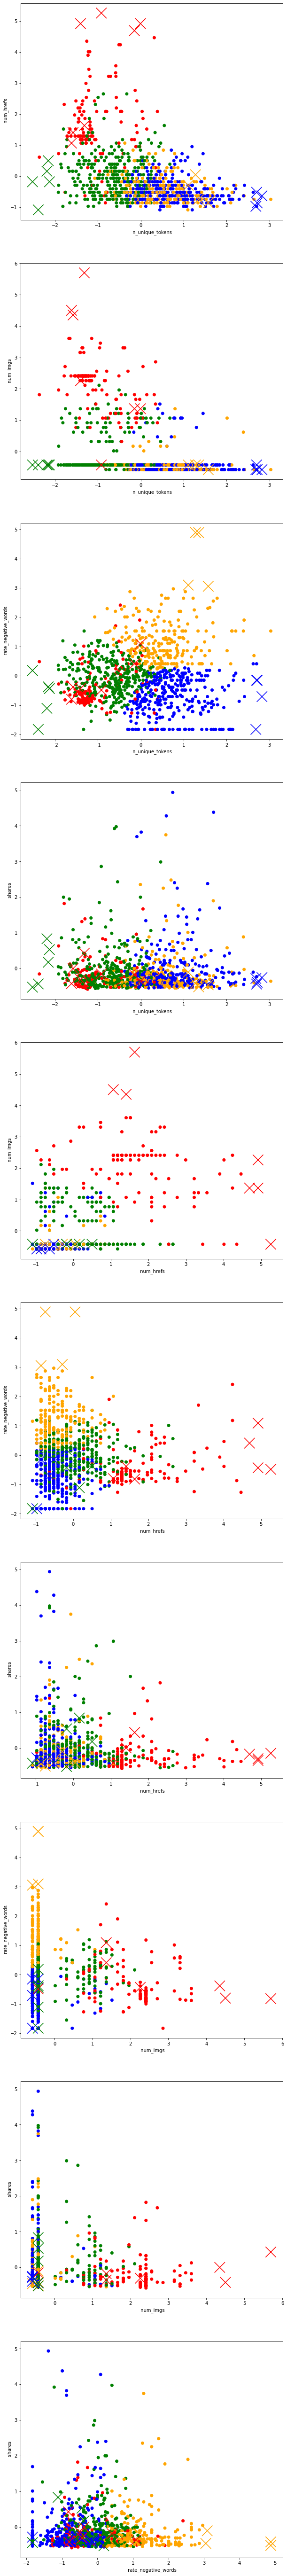

In [ ]:
fig, axes = plt.subplots(10, figsize = (10, 100))

for i in range(len(pairs)):
    comb = pairs[i]
    axes[i].set_xlabel(comb[0])
    axes[i].set_ylabel(comb[1])
    axes[i].scatter(x = train_val[comb[0]], y = train_val[comb[1]], color=point_colors)
    axes[i].scatter(x = test_val[comb[0]], y = test_val[comb[1]], color=test_data_colors, marker="x", s=500)

plt.show()

In [ ]:
outlier_index4 = []
count = 0;
for idx, elem in enumerate(kmeans.labels_):
  if elem == 0:
    if df[' rate_negative_words'][idx] < 1 and df[' rate_negative_words'][idx] > 0 and df[' n_unique_tokens'][idx] > 0.5: # and count < 15:
      #print(data['url'][idx])
      outlier_index4.append(idx)
      count += 1

In [ ]:
new_df = data[[' n_unique_tokens', ' num_hrefs', ' num_imgs', ' rate_negative_words', ' shares']][0:1000]
for column in new_df.columns:
    new_df[column] = (new_df[column] - new_df[column].mean()) / new_df[column].std()
    
test_val = new_df.iloc[outlier_index4]
#test_val

In [ ]:
outlier_index5 = np.concatenate((outlier_index4, list_index_to_remove))
train_val = new_df.drop(labels=outlier_index5, axis=0)
#train_val

In [ ]:
print(len(df.values), len(test_val), len(train_val))

978 38 940


In [ ]:
kmeans3 = KMeans(n_clusters=4).fit(train_val.values)
predicted = kmeans3.predict(test_val.values)
predicted

array([2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2], dtype=int32)

In [ ]:
colors = ['blue', 'red', 'orange', 'green', 'black']
point_colors = []
test_data_colors = []
for elem in kmeans3.labels_:
    point_colors.append(colors[elem])

for elem in predicted:
    test_data_colors.append(colors[elem])

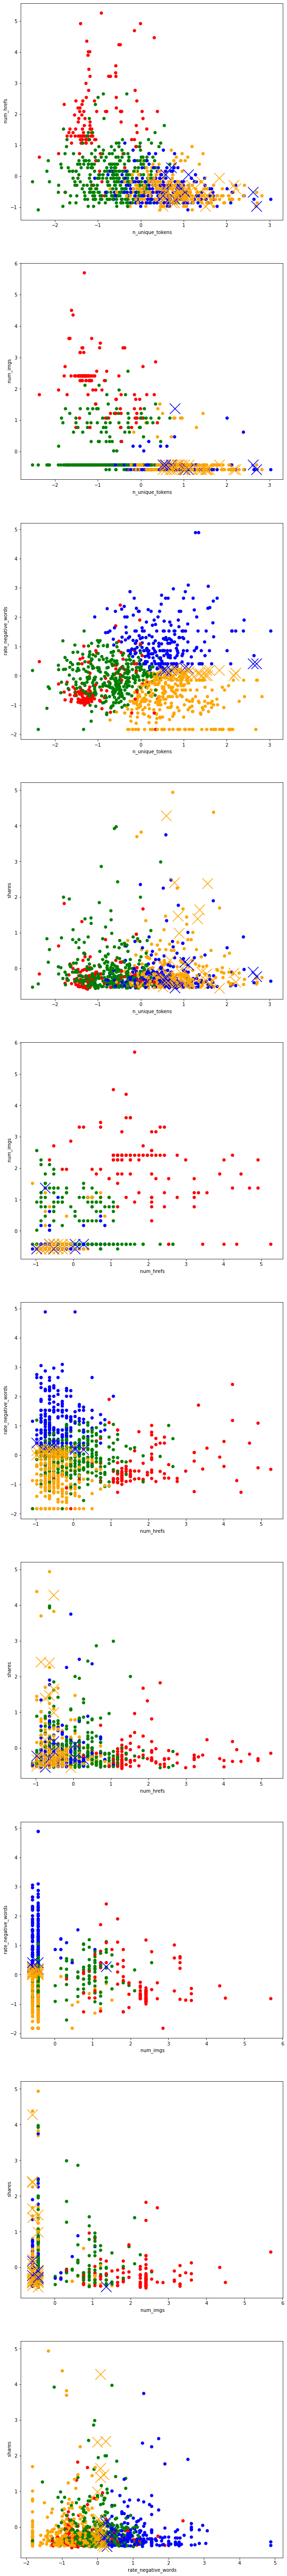

In [ ]:
fig, axes = plt.subplots(10, figsize = (10, 100))

for i in range(len(pairs)):
    comb = pairs[i]
    axes[i].set_xlabel(comb[0])
    axes[i].set_ylabel(comb[1])
    axes[i].scatter(x = train_val[comb[0]], y = train_val[comb[1]], color=point_colors)
    axes[i].scatter(x = test_val[comb[0]], y = test_val[comb[1]], color=test_data_colors, marker="x", s=500)

plt.show()